<a href="https://colab.research.google.com/github/SandySingh72/DATA_Analytics/blob/main/TF_Analysis_Glass_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
glass = pd.read_csv("Glass.csv")
glass['Type'].unique()

array(['building_windows_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed', 'containers', 'tableware',
       'headlamps'], dtype=object)

In [3]:
ohe_y = pd.get_dummies(glass['Type'])
X = glass.drop('Type', axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, ohe_y, test_size=0.3, random_state=25,
                                                    stratify=glass['Type'] )

In [5]:
scaler = MinMaxScaler().set_output(transform='pandas')
X_trn_scl = scaler.fit_transform(X_train)
X_tst_scl = scaler.transform(X_test)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(6, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(), activation="relu"),
    tf.keras.layers.Dense(5, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(), activation="relu"),
    tf.keras.layers.Dense(4, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(), activation="relu"),
    tf.keras.layers.Dense(6, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='softmax')
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss= tf.keras.losses.CategoricalCrossentropy()  ,metrics=['acc'])

In [8]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy() ,metrics=['acc'])

In [9]:
history = model.fit( X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=1000, callbacks=[early])

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 459ms/step - acc: 0.1093 - loss: 0.7010 - val_acc: 0.0615 - val_loss: 0.7012
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.1400 - loss: 0.6974 - val_acc: 0.1385 - val_loss: 0.6964
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.2554 - loss: 0.6923 - val_acc: 0.2615 - val_loss: 0.6921
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3300 - loss: 0.6879 - val_acc: 0.3385 - val_loss: 0.6878
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3249 - loss: 0.6816 - val_acc: 0.3385 - val_loss: 0.6840
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.2944 - loss: 0.6815 - val_acc: 0.3385 - val_loss: 0.6805
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3243 - loss: 0.6757 - val_acc: 0.3231 - val_loss: 0.6771
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.3068 - loss: 0.6735 - val_acc: 0.3231 - val_loss: 0.6739
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.324

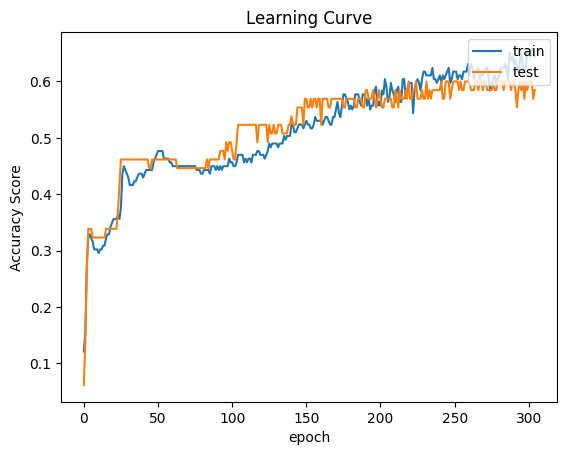

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Learning Curve')
plt.ylabel('Accuracy Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

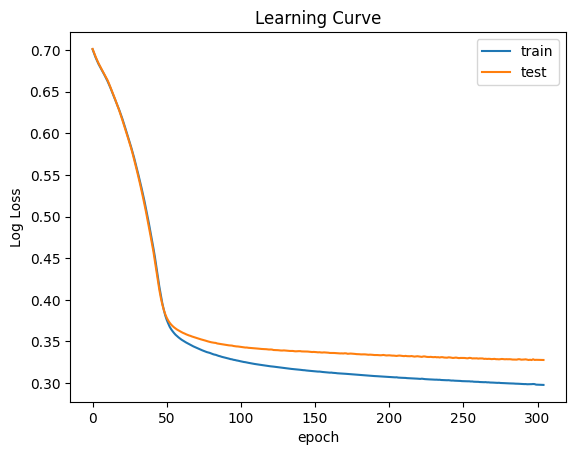

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Log Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()